# Dự đoán tình trạng xe với kNN

In [2]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

## 1. Load và convert dữ liệu 

In [3]:
# Header: #price,maintenance,doors,persons,lug_capacity,safety,output (the condition of the car)
raw_data = np.genfromtxt('data/used_car_evaluation.csv', dtype=str, 
                         delimiter=',', skip_header=1)
print(raw_data[0])
print(raw_data[-1])
print(raw_data.shape)

['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
['low' 'low' '5more' 'more' 'big' 'high' 'vgood']
(1728, 7)


**Vì dữ liệu là dạng categorical, cần chuyển sang dạng số**

In [4]:
# Sử dụng LabelEncoder của thư viện sklearn để chuyển từng cột sang dạng số
# Lưu ý: phải thực hiện trên từng cột, vì mỗi cột là 1 feature

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()

X = np.stack([LE.fit_transform(col) for col in raw_data.T[0:6]], axis=1)
print(X.shape)

Y = LE.fit_transform(raw_data[:,6])
print(Y.shape)

(1728, 6)
(1728,)


## 2. Chia dữ liệu ra thành 2 tập train và test

In [5]:
np.random.seed(3000)
rand_indices = np.arange(1728)
np.random.shuffle(rand_indices)
print(rand_indices)

[1296 1391  123 ... 1016 1587 1532]


In [6]:
N_TRAIN = 1200
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]

x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(1200, 6) (1200,)
(528, 6) (528,)


## 3. kNN

**Hàm tính khoảng cách theo công thức Euclidian**

In [7]:
def tinh_khoang_cach(test_s, train_s):
    kc = np.sqrt(np.sum((test_s - train_s)**2))
    return kc

# Tính thử một trường hợp
print(x_test[0], x_train[0])
tinh_khoang_cach(x_test[0], x_train[0])

[1 1 1 0 0 0] [1 3 0 0 2 1]


3.1622776601683795

**kNN cho 1 sample trong tập test**

In [8]:
K = 13
# Hàm tìm giá trị 
def kNN_OneSample(test_sample):
    list_kc = []
    for train_sample in x_train:
        kc_i = tinh_khoang_cach(test_sample, train_sample)
        list_kc.append(kc_i)
    
    # Tìm ra k mẫu lân cận gần nhất
    list_kc = np.array(list_kc)
    list_kNN_index = np.argsort(list_kc)[0:K]

    # Tìm "vote" cho nhãn của test sample
    vals, counts = np.unique(y_train[list_kNN_index], return_counts=True)
    max_idx = np.argmax(counts)
    return vals[max_idx]

kNN_OneSample(x_test[0])

2

**Tiến hành dự đoán cho toàn bộ các sample trong tập x_test**

In [9]:
y_hat = []
for test_s in x_test:
    lab = kNN_OneSample(test_s)
    y_hat.append(lab)
y_hat = np.array(y_hat)
print(y_hat)

[2 2 0 2 2 3 0 0 2 2 1 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2
 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 0 1 0 2 0 2 2 0 0 0 2 2 2 2 2 2
 2 2 2 0 0 1 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 0 2 2 0 3
 2 2 2 2 2 0 0 3 2 2 2 2 2 3 2 0 2 2 0 2 2 0 2 2 2 2 2 3 0 2 2 2 2 0 2 2 2
 2 2 3 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 2 2 2 0 2 0 2 1 0 2 3 2 0 0 2 2 2 0 2 2 0 2 2 2 0 2 0
 0 2 2 2 0 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 3 2 2 2 0 2 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 3 3 0 2 2 0 2 2 2 1 2 2 2 2 2 0 2 3 2 0 1 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 0 2 2 3 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 0 2 2 0 2 2 2 2 

### 3.1. Accuracy

In [10]:
acc = 100*np.count_nonzero(y_hat == y_test)/y_hat.size
acc

85.79545454545455

### 3.2. Confusion matrix

CM chỉ làm việc với các giá trị dự đoán là 1 và 0, vậy có nhiều class thì sao?

**Giả sử ta cần tính CM của các class có nhãn là 3 (unacc)**

In [11]:
y_hat[y_test==3]

array([3, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 1, 2, 3, 3],
      dtype=int64)

In [14]:
# Tạo mảng targets (ground-truth) cho class 3
# (Lưu ý: ở đây set các giá trị không phải là 3 thành 0)
y3_test = y_test.copy()
y3_test[y3_test != 3] = 0
print(y3_test)

[0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
# Tạo mảng predicts cho class 3
# Ở đây cũng set các giá trị không phải là 3 thành 0
y3_hat = y_hat.copy()
y3_hat[y3_hat != 3] = 0
print(y3_hat)

[0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**Tính các giá trị trong CM**

In [16]:
TP = np.count_nonzero((y3_hat == 3)*(y3_test == 3))
print(TP)

13


In [18]:
FP = np.count_nonzero((y3_hat == 3)*(y3_test != 3))
print(FP)

2


In [19]:
TN = np.count_nonzero((y3_hat != 3)*(y3_test != 3))
print(TN)

506


In [20]:
FN = np.count_nonzero((y3_hat != 3)*(y3_test == 3))
print(FN)

7


**Tính Accuracy**

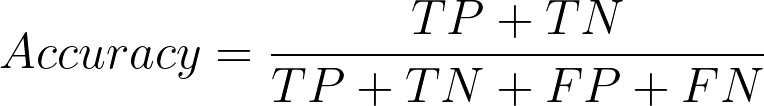

In [21]:
acc3 = (TP + TN)/(TP + TN + FP + FN)
print(acc3)

0.9829545454545454


### 3.3. Precision, Recall, F1-score

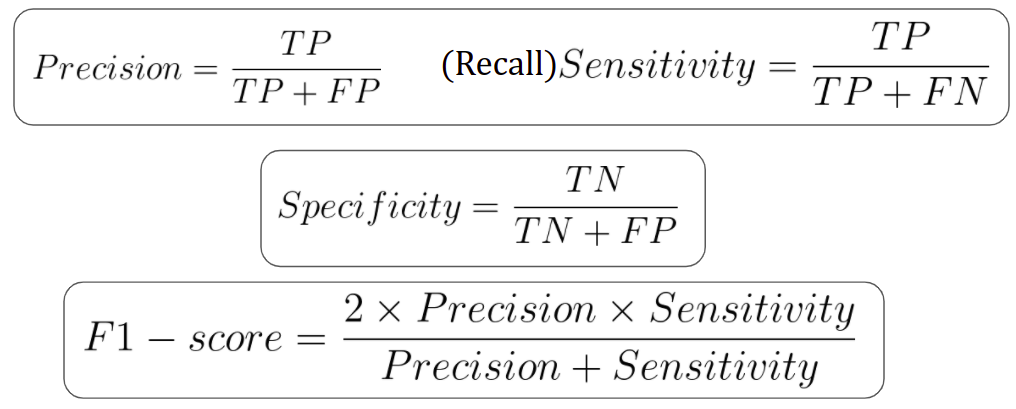

In [22]:
precision = TP / (TP + FP)
print(precision)

0.8666666666666667


In [23]:
recall = TP / (TP + FN)
print(recall)

0.65


In [24]:
specificity = TN / (TN + FP)
print(specificity)

0.9960629921259843


In [25]:
f1_score = (2*precision*recall) / (precision + recall)
print(f1_score)

0.7428571428571429


### 3.4. Tính TPR và FPR
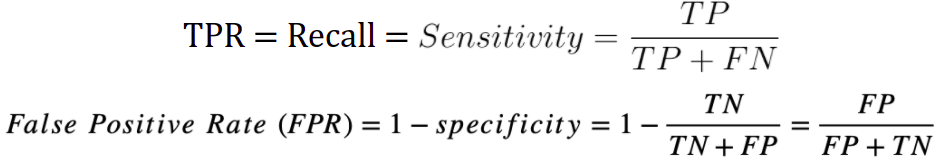

In [26]:
TPR = recall
print(TPR)

FPR = 1 - specificity 
print(FPR)

0.65
0.003937007874015741


**Tính lại FPR theo công thức**

In [27]:
FPR_ = FP / (FP + TN)
print(FPR_)

0.003937007874015748
